In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics 
%matplotlib inline
file = './Desktop/Prep_Capstone1.csv'
df = pd.read_csv(file)

#Test to ensure all fields from original dataset are accounted for 
print(df.columns)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')


{'039 - EXTRACRANIAL PROCEDURES W/O CC/MCC': 33606, '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC': 30212, '069 - TRANSIENT ISCHEMIA': 79590, '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC': 62093, '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC': 106414, '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC': 55849, '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC': 21659, '101 - SEIZURES W/O MCC': 48854, '149 - DYSEQUILIBRIUM': 23427, '176 - PULMONARY EMBOLISM W/O MCC': 32042, '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC': 66660, '189 - PULMONARY EDEMA & RESPIRATORY FAILURE': 95099, '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC': 56100, '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC': 149677, '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC': 148491, '193 - SIMPLE PNEUMONIA & PLEURISY W MCC': 127989, '194 - SIMPLE PNEUMONIA & PLEURISY W CC': 198390, '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC': 114790, '195 - S

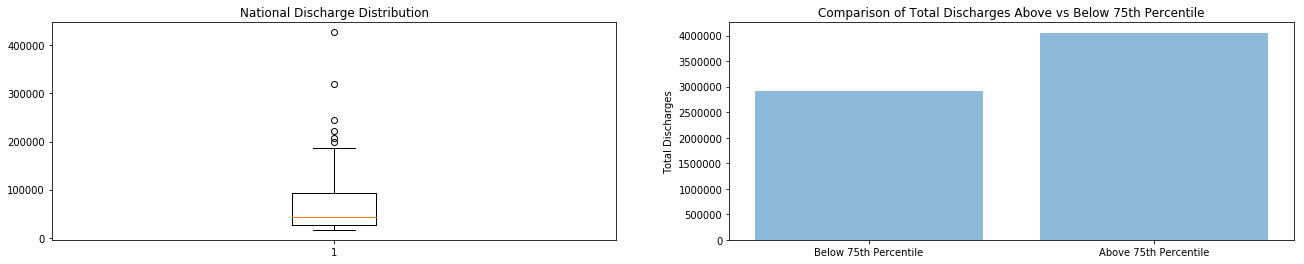

The 75th percentile is marked by the value 93413.0.
The 25th percentile is marked by the value 26405.25.
The upper_whisker is marked by the value 185599.
The lower_whisker is marked by the value 16157.
The IQR is 67007.75.
The range excluding outliers is 169442.
The range including outliers is 411050.
The mean for total national discharges for these 100 DRGs is 69753.
The mean for total national discharges excluding outliers is 56990.
The median value for total national discharges for these 100 DRGs is 42186.0.
The standard deviation for total national discharges for these 100 DRGs is 67482.90729620056.


In [123]:
#Analytic Question 1 


#Dictionary of national discharge numbers for each DRG (DRG frequencies)
drg_frequency = {}
for DRG, Discharges in zip(df['DRG Definition'], df[' Total Discharges ']):
    if DRG not in drg_frequency:
        drg_frequency[DRG] = Discharges
    else: 
        drg_frequency[DRG] += Discharges 
print(drg_frequency)

#Test to ensure all DRGs are accounted for
print('There are {} DRGs in this dictionary.'.format(len(drg_frequency.keys())))

#Dataframe of national discharge numbers for each DRG (DRG frequencies)
drg_freq_table = pd.DataFrame(sorted(drg_frequency.items(), key=lambda x: x[1]), columns=["DRG", "Total National Discharges"])
print(drg_freq_table)

#Sum of all national discharges for FY 2011
sum_all_discharges = drg_freq_table['Total National Discharges'].sum()
print('The total number of national discharges for FY 2011 was {}.'.format(sum_all_discharges))

#Sum of the number of DRGS with discharge values that fall below 93,413, which serves as the 75th percentile boundary 
group_1_number = (drg_freq_table['Total National Discharges'] < 93413).sum()
print("{} DRGs have discharge values that fall below the 75th percentile.".format(group_1_number))

#Sum the national discharges that fall below the 75th percentile 
group_1_sum= drg_freq_table[drg_freq_table['Total National Discharges'] < 93413]['Total National Discharges'].sum()
print('The total number of national discharges falling below the 75th percentile is {}.'.format(group_1_sum) + 
" This accounts for {} % of the total number of national discharges.".format((group_1_sum/sum_all_discharges)*100))

#Sum the national dicharges that are at or above the 75th percentile
group_2_sum=drg_freq_table[drg_freq_table['Total National Discharges']>= 93413]['Total National Discharges'].sum()
print('The total number of national discharges greater than or equal to the 75th percentile is {}.'.format(group_2_sum) + 
" This accounts for {} % of the total number of national discharges.".format((group_2_sum/sum_all_discharges)*100))


#Summary statistics plots for National Discharges 
#Boxplot

plt.subplot(1,2,1)
plt.boxplot(drg_freq_table['Total National Discharges'])
plt.title("National Discharge Distribution")

#Bar Graph to compare Discharges under and above 75th percentile
groups_arr = ['Below 75th Percentile', 'Above 75th Percentile']
y_pos = np.arange(len(groups_arr))
performance = [group_1_sum, group_2_sum]

plt.subplot(1,2,2)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, groups_arr)
plt.ylabel('Total Discharges')
plt.title('Comparison of Total Discharges Above vs Below 75th Percentile')
plt.subplots_adjust(right=3)
plt.show()

#Gather summary statistics using boxplot 
upper_quartile = np.percentile(drg_freq_table['Total National Discharges'], 75)
lower_quartile = np.percentile(drg_freq_table['Total National Discharges'], 25)
iqr = upper_quartile - lower_quartile
upper_whisker = drg_freq_table['Total National Discharges'][drg_freq_table['Total National Discharges']<=upper_quartile + 1.5*iqr].max()
lower_whisker = drg_freq_table['Total National Discharges'][drg_freq_table['Total National Discharges']>=lower_quartile - 1.5*iqr].min()
print('The 75th percentile is marked by the value {}.'.format(upper_quartile))
print('The 25th percentile is marked by the value {}.'.format(lower_quartile))
print('The upper_whisker is marked by the value {}.'.format(upper_whisker))
print('The lower_whisker is marked by the value {}.'.format(lower_whisker))
print('The IQR is {}.'.format(iqr))
print('The range excluding outliers is {}.'.format(upper_whisker - lower_whisker))
print('The range including outliers is {}.'.format(drg_freq_table['Total National Discharges'].max() - drg_freq_table['Total National Discharges'].min()))

#Summary statistics using functions
drg_freq_mean = statistics.mean(drg_freq_table['Total National Discharges'])
print('The mean for total national discharges for these 100 DRGs is {}.'.format(drg_freq_mean))
drg_freq_mean_no_outliers = statistics.mean(drg_freq_table['Total National Discharges'][drg_freq_table['Total National Discharges']<=185599])
print('The mean for total national discharges excluding outliers is {}.'.format(drg_freq_mean_no_outliers))
drg_freq_median = statistics.median(drg_freq_table['Total National Discharges'])
print('The median value for total national discharges for these 100 DRGs is {}.'.format(drg_freq_median))
#drg_freq_mode = statistics.mode(drg_freq_table['Total National Discharges'])
#print('The mode for total national discharges for each DRG is {}.'.format(drg_freq_mode))
drg_freq_std = np.std(drg_freq_table['Total National Discharges'])
print('The standard deviation for total national discharges for these 100 DRGs is {}.'.format(drg_freq_std))

{'039 - EXTRACRANIAL PROCEDURES W/O CC/MCC': 5994748.6899999939, '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC': 6847713.5599999884, '069 - TRANSIENT ISCHEMIA': 7754363.7499999991, '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC': 20095217.229999997, '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC': 15387227.549999988, '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC': 8071381.6299999971, '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC': 5128569.2700000014, '101 - SEIZURES W/O MCC': 7092992.9300000081, '149 - DYSEQUILIBRIUM': 3399388.9399999999, '176 - PULMONARY EMBOLISM W/O MCC': 8484816.3299999982, '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC': 24330731.73999998, '189 - PULMONARY EDEMA & RESPIRATORY FAILURE': 16837450.079999987, '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC': 17277348.910000004, '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC': 19371357.830000032, '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC': 1529

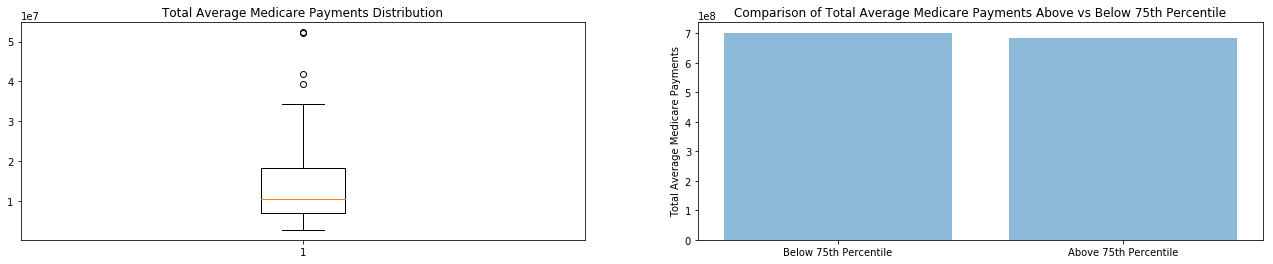

The 75th percentile is marked by the value 18344615.53000001.
The 25th percentile is marked by the value 6987413.0774999885.
The upper_whisker is marked by the value 34277714.96000003.
The lower_whisker is marked by the value 2824156.800000001.
The IQR is 11357202.45250002.
The range excluding outliers is 31453558.16000003.
The range including outliers is 49512227.439999975.
The mean for total national average Medicare payments for these 100 DRGs is 13851541.690499999.
The mean for total national average Medicare payments excluding outliers is 12265847.908421053.
The median value for total national average Medicare payments for these 100 DRGs is 10593718.55999999.
The standard deviation for total national average Medicare payments for these 100 DRGs is 9876772.58301064.


In [124]:
#Analytic Question 2

#Dictionary of total average Medicare payments for each type of DRG
assoc_medicare_payments = {}
for DRG, Avg_MP in zip(df['DRG Definition'], df['Average Medicare Payments']):
    if DRG not in assoc_medicare_payments:
        assoc_medicare_payments[DRG] = Avg_MP
    else: 
        assoc_medicare_payments[DRG] += Avg_MP
print(assoc_medicare_payments)

#Test to ensure all 100 DRGs are accounted for 
print('There are {} DRGs in this dictionary.'.format(len(assoc_medicare_payments.keys())))

#Dataframe of total national average Medicare payments for each DRG 
drg_MP_table = pd.DataFrame(sorted(assoc_medicare_payments.items(), key=lambda x: x[1]), columns=["DRG", "Total Average Medicare Payments"])
print(drg_MP_table)

#Sum of total national average Medicare payments for FY 2011
sum_all_MP = drg_MP_table['Total Average Medicare Payments'].sum()
print('The total national average Medicare payout for these 100 DRGs in FY 2011 was {}.'.format(sum_all_MP))

#Sum of the number of DRGS with total average Medicare payments that fall below $18,344,615.53, which serves as the 75th percentile boundary 
group_1_number = (drg_MP_table['Total Average Medicare Payments'] < 18344615.53).sum()
print("{} DRGs have total average medicare payouts that fall below the 75th percentile.".format(group_1_number))

#Sum the total average Medicare payments that fall below the 75th percentile 
group_1_sum= drg_MP_table[drg_MP_table['Total Average Medicare Payments'] < 18344615.53]['Total Average Medicare Payments'].sum()
print('The sum total of national average Medicare payments falling below the 75th percentile is {}.'.format(group_1_sum) + 
" This accounts for {} % of the sum total of all average Medicare payments.".format((group_1_sum/sum_all_MP)*100))

#Sum the total average Medicare payments that are at or above the 75th percentile
group_2_sum=drg_MP_table[drg_MP_table['Total Average Medicare Payments']>= 18344615.53]['Total Average Medicare Payments'].sum()
print('The sum total of national average Medicare payments greater than or equal to the 75th percentile is {}.'.format(group_2_sum) + 
" This accounts for {} % of the sum total of all average Medicare payments.".format((group_2_sum/sum_all_MP)*100))

#Summary statistics plots for national Average Medicare Payments 
#Boxplot
plt.subplot(1,2,1)
plt.boxplot(drg_MP_table['Total Average Medicare Payments'])
plt.title("Total Average Medicare Payments Distribution")

#Bar Graph to compare Total Average Medicare Payments under and over the 75th percentile 
groups_arr = ['Below 75th Percentile',"Above 75th Percentile"]
y_pos = np.arange(len(groups_arr))
performance = [group_1_sum, group_2_sum]

plt.subplot(1,2,2)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, groups_arr)
plt.ylabel('Total Average Medicare Payments')
plt.title('Comparison of Total Average Medicare Payments Above vs Below 75th Percentile')
plt.subplots_adjust(right=3)
plt.show()


#Gather summary statistics using boxplot
upper_quartile = np.percentile(drg_MP_table['Total Average Medicare Payments'], 75)
lower_quartile = np.percentile(drg_MP_table['Total Average Medicare Payments'], 25)
iqr = upper_quartile - lower_quartile
upper_whisker = drg_MP_table['Total Average Medicare Payments'][drg_MP_table['Total Average Medicare Payments']<=upper_quartile + 1.5*iqr].max()
lower_whisker = drg_MP_table['Total Average Medicare Payments'][drg_MP_table['Total Average Medicare Payments']>=lower_quartile - 1.5*iqr].min()
print('The 75th percentile is marked by the value {}.'.format(upper_quartile))
print('The 25th percentile is marked by the value {}.'.format(lower_quartile))
print('The upper_whisker is marked by the value {}.'.format(upper_whisker))
print('The lower_whisker is marked by the value {}.'.format(lower_whisker))
print('The IQR is {}.'.format(iqr))
print('The range excluding outliers is {}.'.format(upper_whisker - lower_whisker))
print('The range including outliers is {}.'.format(drg_MP_table['Total Average Medicare Payments'].max() - drg_MP_table['Total Average Medicare Payments'].min()))


#Summary statistics using functions
drg_MP_mean = statistics.mean(drg_MP_table['Total Average Medicare Payments'])
print('The mean for total national average Medicare payments for these 100 DRGs is {}.'.format(drg_MP_mean))
drg_MP_mean_no_outliers = statistics.mean(drg_MP_table['Total Average Medicare Payments'][drg_MP_table['Total Average Medicare Payments']<=34277714.96])
print('The mean for total national average Medicare payments excluding outliers is {}.'.format(drg_MP_mean_no_outliers))
drg_MP_median = statistics.median(drg_MP_table['Total Average Medicare Payments'])
print('The median value for total national average Medicare payments for these 100 DRGs is {}.'.format(drg_MP_median))
#drg_MP_mode = statistics.mode(drg_MP_table['Total Average Medicare Payments'])
#print('The mode for total national average Medicare payments for these 100 DRGs is {}.'.format(drg_MP_mode))
drg_MP_std = np.std(drg_MP_table['Total Average Medicare Payments'])
print('The standard deviation for total national average Medicare payments for these 100 DRGs is {}.'.format(drg_MP_std))



    Total National Discharges  Total Average Medicare Payments
0                       33606                       5994748.69
1                       30212                       6847713.56
2                       62093                      20095217.23
3                      106414                      15387227.55
4                       55849                       8071381.63
5                       79590                       7754363.75
6                       21659                       5128569.27
7                       48854                       7092992.93
8                       23427                       3399388.94
9                       32042                       8484816.33
10                      66660                      24330731.74
11                      56100                      17277348.91
12                      95099                      16837450.08
13                     149677                      19371357.83
14                     148491                      1529

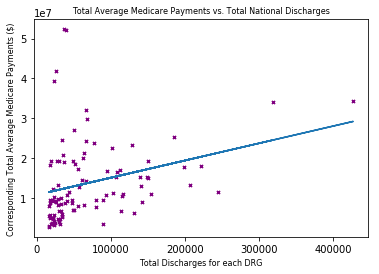

In [125]:
#Analytic Question 3 

#Make Scatterplot comparing the DRG Discharge frequencies to the Total Average Medicare Payments associated with each DRG

#Steps to make a DataFrame with columns "Total Discharges" and "Total Average Medicare Payments" for each DRG
sorted_by_drg_freq_table = pd.DataFrame(sorted(drg_frequency.items()), columns=["DRG", "Total National Discharges"])
#print(sorted_by_drg_freq_table)

sorted_by_drg_MP_table = pd.DataFrame(sorted(assoc_medicare_payments.items()), columns = ['DRG', "Total Average Medicare Payments"])
#print(sorted_by_drg_MP_table)

discharges_vs_MPs = pd.DataFrame()
discharges_vs_MPs['Total National Discharges'] = sorted_by_drg_freq_table['Total National Discharges']
discharges_vs_MPs['Total Average Medicare Payments'] = sorted_by_drg_MP_table['Total Average Medicare Payments']
print(discharges_vs_MPs)

x = discharges_vs_MPs["Total National Discharges"]
y = discharges_vs_MPs["Total Average Medicare Payments"]

plt.scatter(x=x, y=y, color = 'purple', marker = 'x', s = 10)
plt.xlabel('Total Discharges for each DRG', fontsize=8)
plt.ylabel('Corresponding Total Average Medicare Payments ($)', fontsize=8)
plt.title('Total Average Medicare Payments vs. Total National Discharges', fontsize=8)
m, b = np.polyfit(x, y, 1)
#plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
print(linregress(x,y))